In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts
from pprint import pprint
import datetime

In [2]:
#read data paths for data sets
PYPL_data_path = "Data/PYPL.csv"
SQ_data_path = "Data/SQ.csv"
SHOP_data_path = "Data/SHOP.csv"
BITCOIN_data_path = "Data/BITCOIN.csv"

In [3]:
#read CSV files and assign to variables
PYPL_data = pd.read_csv(PYPL_data_path)
SQ_data = pd.read_csv(SQ_data_path)
SHOP_data = pd.read_csv(SHOP_data_path)
BITCOIN_data = pd.read_csv(BITCOIN_data_path)

In [4]:
#read in each data set, rename columns so merging is not confusing, and change date column format

PYPL_df = PYPL_data[['Date','Close','Volume']]
PYPL_df = PYPL_df.rename(columns={'Close': 'PYPL_close', 'Volume': 'PYPL_volume'})
PYPL_df['Date'] = pd.to_datetime(PYPL_df['Date'])

SQ_df = SQ_data[['Date','Close','Volume']]
SQ_df = SQ_df.rename(columns={'Close': 'SQ_close', 'Volume': 'SQ_volume'})
SQ_df['Date'] = pd.to_datetime(SQ_df['Date'])

SHOP_df = SHOP_data[['Date','Close','Volume']]
SHOP_df = SHOP_df.rename(columns={'Close': 'SHOP_close', 'Volume': 'SHOP_volume'})
SHOP_df['Date'] = pd.to_datetime(SHOP_df['Date'])

BITCOIN_df = BITCOIN_data[['Date','Price','Volume']]
BITCOIN_df = BITCOIN_df.rename(columns={'Price': 'bitcoin_price', 'Volume': 'bitcoin_volume'})
BITCOIN_df['Date'] = pd.to_datetime(BITCOIN_df['Date'])

In [5]:
#merge all data sets to one

merged_stocks = pd.merge(BITCOIN_df, PYPL_df, on='Date', how='outer')
merged_stocks = pd.merge(merged_stocks, SQ_df, on='Date', how='outer')
merged_stocks = pd.merge(merged_stocks, SHOP_df, on='Date', how='outer')

#sort data set by Date column
merged_stocks = merged_stocks.sort_values(by=['Date']).reset_index(drop=True)

#drop any null value rows
merged_stocks = merged_stocks.dropna()

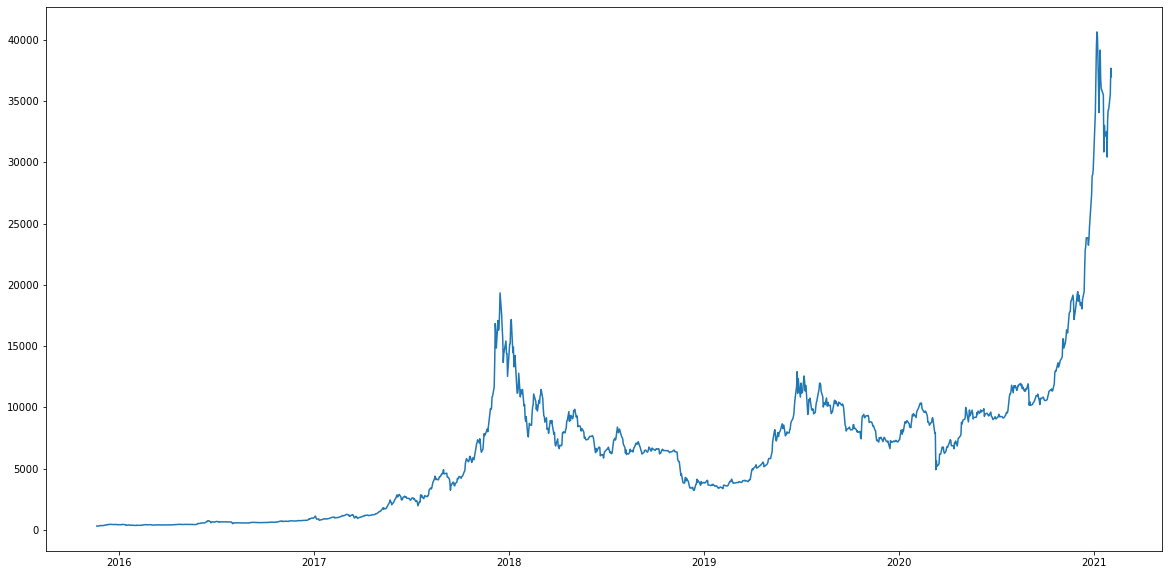

In [90]:
#BITCOIN PRICES LINE CHART
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(merged_stocks.Date, merged_stocks.bitcoin_price)
plt.savefig('output_data/Bitcoin_price.png')
plt.show()

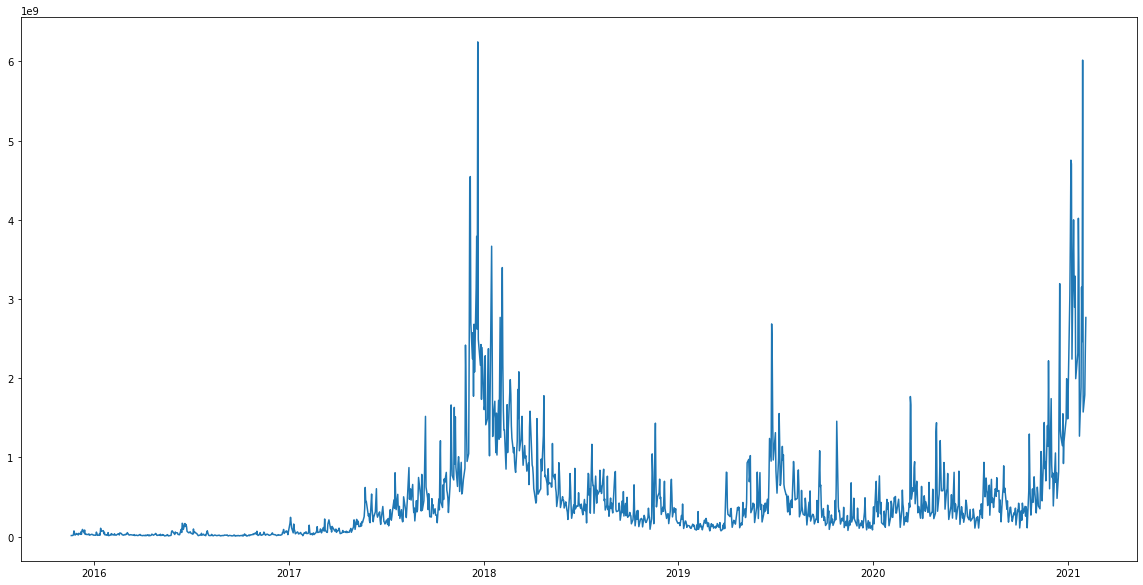

In [91]:
#BITCOIN VOLUME LINE CHART
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(merged_stocks.Date, merged_stocks.bitcoin_volume)
plt.savefig('output_data/Bitcoin_volume.png')
plt.show()

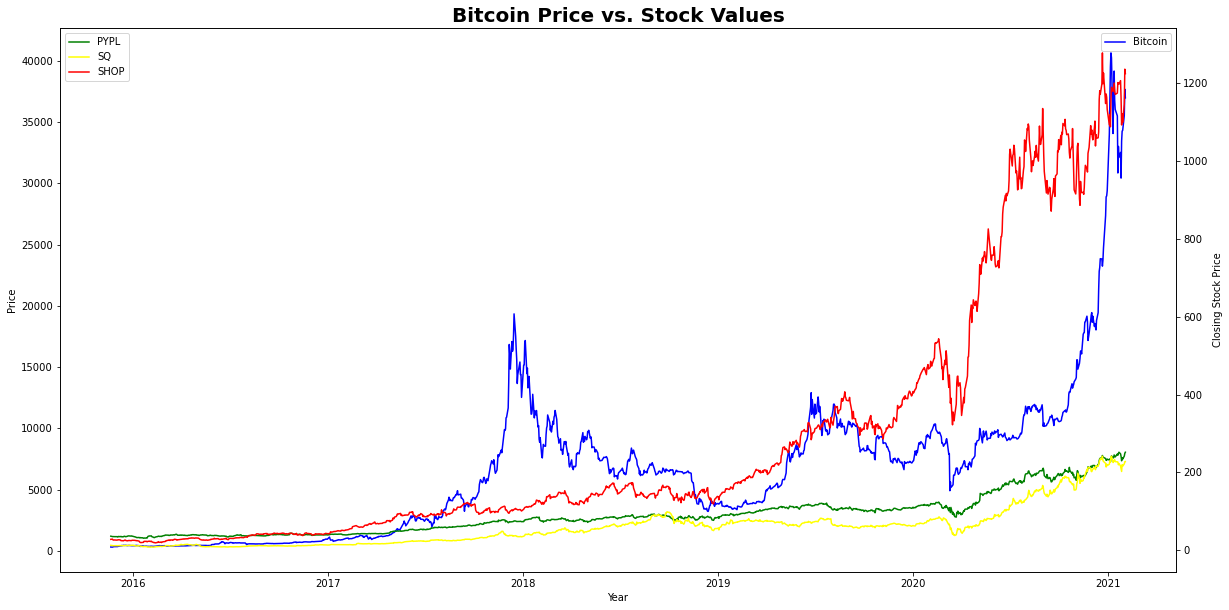

In [69]:
#PRICES LINE CHART

#create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(merged_stocks.Date, merged_stocks.bitcoin_price, color="blue", label="Bitcoin")
plt.legend(loc=1)
ax.set_xlabel("Year")
ax.set_ylabel("Price")

#make second plot with different Y-axis
ax2 = ax.twinx()
ax2.plot(merged_stocks.Date, merged_stocks.PYPL_close, color="green", label="PYPL")
ax2.plot(merged_stocks.Date, merged_stocks.SQ_close, color="yellow", label="SQ")
ax2.plot(merged_stocks.Date, merged_stocks.SHOP_close, color="red", label="SHOP")

ax2.set_title('Bitcoin Price vs. Stock Values', size=20, weight='bold')
ax2.set_ylabel("Closing Stock Price")

plt.legend(loc=2)
plt.savefig('output_data/Values_line.png')
plt.show()

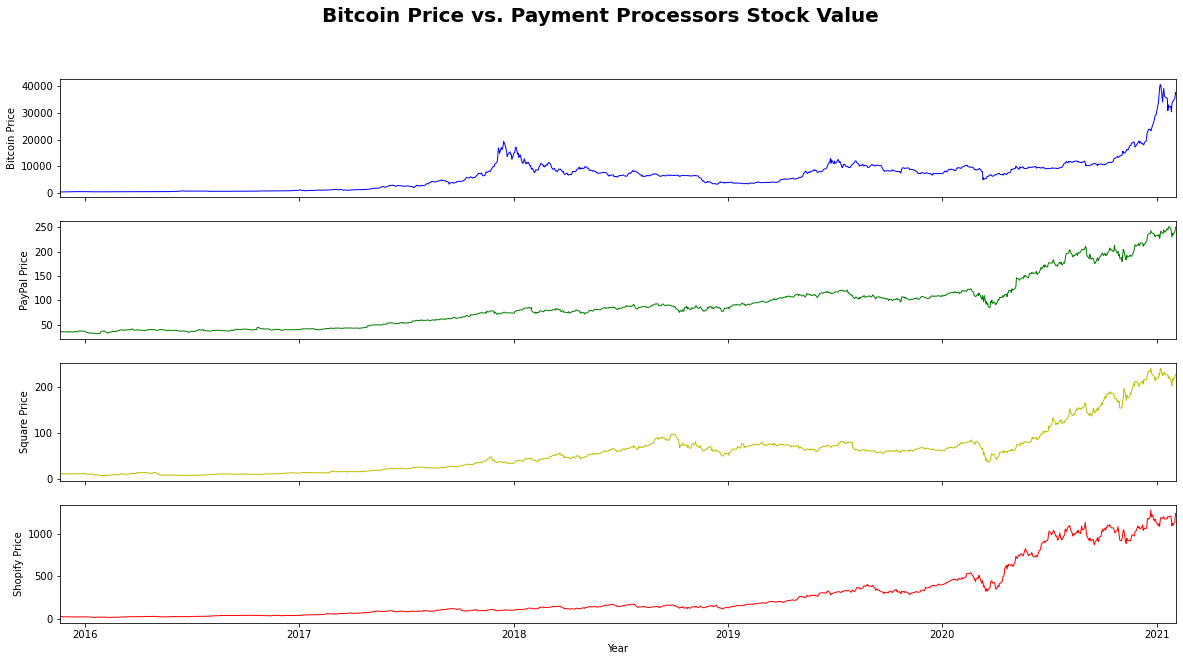

In [70]:
#PRICES SUBPLOT

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(20,10))
fig.suptitle("Bitcoin Price vs. Payment Processors Stock Value", fontsize=20, fontweight="bold")

ax1.set_xlim(min(merged_stocks['Date']), max(merged_stocks['Date']))

ax1.plot(merged_stocks['Date'], merged_stocks['bitcoin_price'], linewidth=1, color='b')
ax1.set_ylabel("Bitcoin Price")

ax2.plot(merged_stocks['Date'], merged_stocks['PYPL_close'], linewidth=1, color='g')
ax2.set_ylabel("PayPal Price")

ax3.plot(merged_stocks['Date'], merged_stocks['SQ_close'], linewidth=1, color='y')
ax3.set_ylabel("Square Price")

ax4.plot(merged_stocks['Date'], merged_stocks['SHOP_close'], linewidth=1, color='r')
ax4.set_ylabel("Shopify Price")

ax4.set_xlabel("Year")
plt.savefig('output_data/Values_subplots.png')
plt.show()

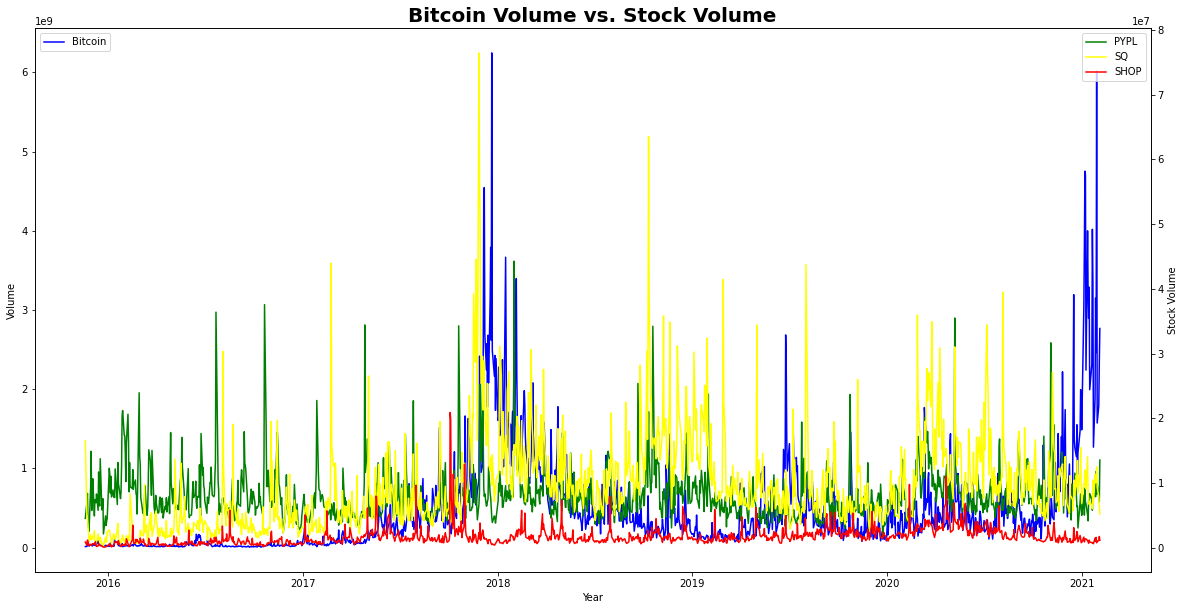

In [71]:
#VOLUME LINE CHART

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(merged_stocks.Date, merged_stocks.bitcoin_volume, color="blue", label="Bitcoin")
plt.legend(loc=2)
ax.set_xlabel("Year")
ax.set_ylabel("Volume")

ax2 = ax.twinx()
ax2.plot(merged_stocks.Date, merged_stocks.PYPL_volume, color="green", label="PYPL")
ax2.plot(merged_stocks.Date, merged_stocks.SQ_volume, color="yellow", label="SQ")
ax2.plot(merged_stocks.Date, merged_stocks.SHOP_volume, color="red", label="SHOP")

ax2.set_title('Bitcoin Volume vs. Stock Volume', size=20, weight='bold')
ax2.set_ylabel("Stock Volume")

plt.legend(loc=1)
plt.savefig('output_data/Volume_line.png')
plt.show()

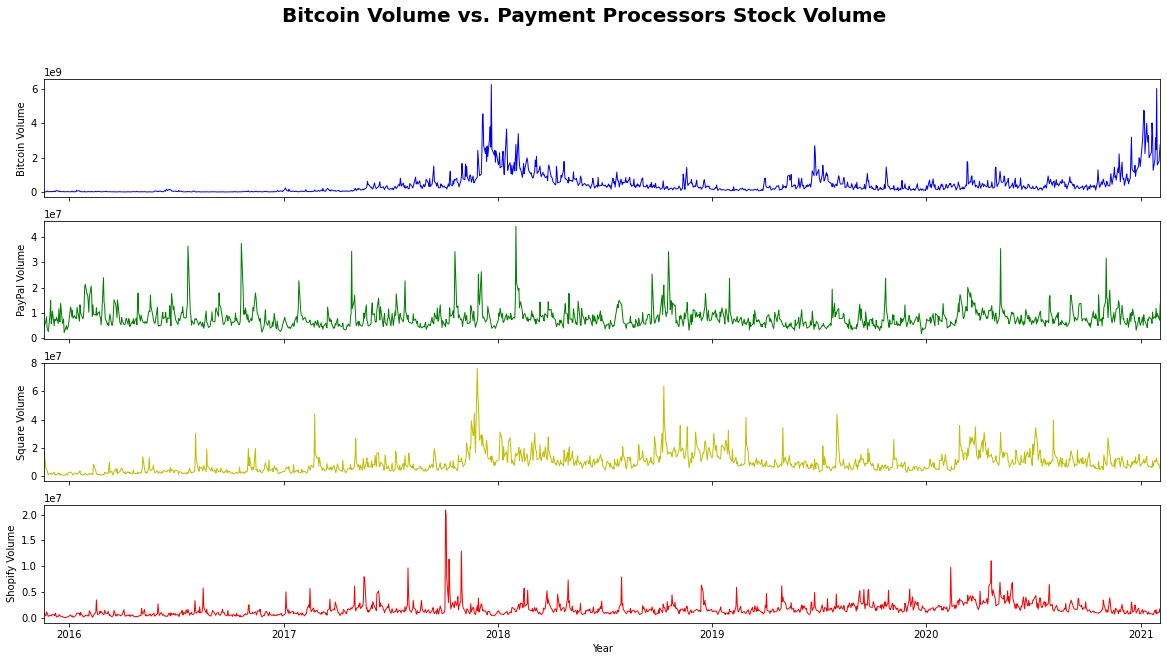

In [72]:
#VOLUME SUBPLOT

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(20,10))
fig.suptitle("Bitcoin Volume vs. Payment Processors Stock Volume", fontsize=20, fontweight="bold")

ax1.set_xlim(min(merged_stocks['Date']), max(merged_stocks['Date']))

ax1.plot(merged_stocks['Date'], merged_stocks['bitcoin_volume'], linewidth=1, color='b')
ax1.set_ylabel("Bitcoin Volume")

ax2.plot(merged_stocks['Date'], merged_stocks['PYPL_volume'], linewidth=1, color='g')
ax2.set_ylabel("PayPal Volume")

ax3.plot(merged_stocks['Date'], merged_stocks['SQ_volume'], linewidth=1, color='y')
ax3.set_ylabel("Square Volume")

ax4.plot(merged_stocks['Date'], merged_stocks['SHOP_volume'], linewidth=1, color='r')
ax4.set_ylabel("Shopify Volume")

ax4.set_xlabel("Year")
plt.savefig('output_data/Volume_subplot.png')
plt.show()

In [13]:
#Pearson correlation coefficient dataframe (Prices/Values)

merged_price = merged_stocks[['bitcoin_price', 'PYPL_close', 
                              'SQ_close', 'SHOP_close']]
merged_price.corr(method='pearson')

,bitcoin_price,PYPL_close,SQ_close,SHOP_close
bitcoin_price,1.000000,0.834492,0.833168,0.751713
PYPL_close,0.834492,1.000000,0.965199,0.961704
SQ_close,0.833168,0.965199,1.000000,0.908731
SHOP_close,0.751713,0.961704,0.908731,1.000000


In [78]:
#Pearson correlation coefficient dataframe (Volume)

merged_volume = merged_stocks[['bitcoin_volume', 'PYPL_volume', 
                               'SQ_volume', 'SHOP_volume']]
merged_volume.corr(method='pearson')

,bitcoin_volume,PYPL_volume,SQ_volume,SHOP_volume
bitcoin_volume,1.000000,0.061559,0.285586,0.048913
PYPL_volume,0.061559,1.000000,0.223933,0.104463
SQ_volume,0.285586,0.223933,1.000000,0.215048
SHOP_volume,0.048913,0.104463,0.215048,1.000000


In [17]:
#Determine return values

merged_stocks['bitcoin_returns'] = merged_stocks['bitcoin_price'].pct_change(1, fill_method = 'ffill')
merged_stocks['PYPL_returns'] = merged_stocks['PYPL_close'].pct_change(1, fill_method = 'ffill')
merged_stocks['SQ_returns'] = merged_stocks['SQ_close'].pct_change(1, fill_method = 'ffill')
merged_stocks['SHOP_returns'] = merged_stocks['SHOP_close'].pct_change(1, fill_method = 'ffill')

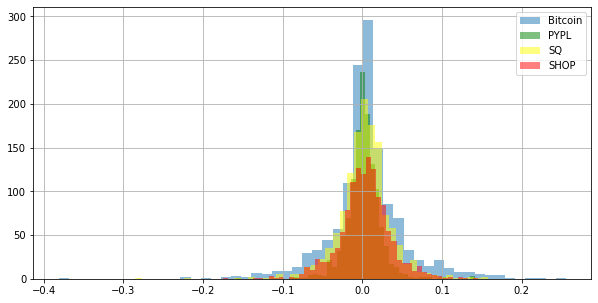

In [80]:
#Print histogram for return values

merged_stocks['bitcoin_returns'].hist(bins=50, label='Bitcoin', figsize=(10,5), alpha=0.5)
merged_stocks['PYPL_returns'].hist(bins=50, label='PYPL', color='green', alpha=0.5)
merged_stocks['SQ_returns'].hist(bins=50, label='SQ', color='yellow', alpha=0.5)
merged_stocks['SHOP_returns'].hist(bins=50, label='SHOP', color='red', alpha=0.5)

plt.legend()
plt.savefig('output_data/returns_histograms.png')
plt.show()
